In [3]:
import pandas as pd
# Alias plt za pyplot se koristi po konvenciji.
import matplotlib.pyplot as plt
# Uvoz numpy modula za rad sa visedimenzionim nizovima.
# Alias np za numpy se koristi po konvenciji.
import numpy as np
# Mapa boja (colormap) za bojenje funkcije greske
from matplotlib import cm
# Obican model Linearne regresije
from sklearn.linear_model import LinearRegression
data = pd.read_csv('datasets/house_prices.csv', sep=';')
# Ispis prvih 5 redova DataFrame-a
print(data.head())

     area   price
0  114.64  179900
1  120.50  153000
2   88.72  127000
3   75.81  110000
4  205.04  180000


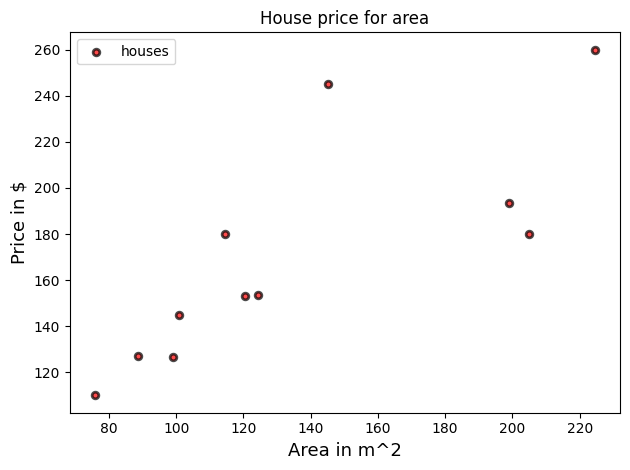

In [4]:
# Uzimamo sve redove (:) i kolonu area.
# Predstavlja skup atributa neophodan za predikciju izlaza.
# ['area'], a ne 'area', jer hocemo DataFrame, a ne Series
X = data.loc[:, ['area']]
# Uzimamo kolonu price.
# Predstavlja skup labela za date atribute (area).
y = data['price']
# Skaliramo vrednosti labela na skalu povrsina nekretnina.
# Bitno je da su vrednosti na priblizno slicnoj skali.
# U suprotnom, korak ucenja bi bio prilagodjen samo
# koeficijentima atributa sa vrednostima na istoj skali.
# Time ubrzavamo algoritam gradijentnog spusta.
y = y / 1000
# Kreiranje (aktiviranje) nove figure.
# To ce biti i naslov novog prozora.
plt.figure('House prices')
# Rasejavanje tacaka u Dekartovom koordinatnom sistemu.
# X - podaci za X osu, y - podaci za y osu
# s - velicina markera, c - boja markera
# marker - izgled markera, alpha - transparentnost markera
# edgecolors - boja ivice markera
# linewidth - velicina ivice markera
# label – labela za legendu za tacke
plt.scatter(X, y, s=23, c='red', marker='o', alpha=0.7, 
edgecolors='black', linewidths=2, label='houses')
# Labele za ose i naslov.
plt.xlabel('Area in m^2', fontsize=13)
plt.ylabel('Price in $', fontsize=13)
plt.title('House price for area')
# Prikazivanje legende na grafiku.
# Postavljena je labela samo za prvu tacku,
# ali sve tacke predstavljaju kuce.
plt.legend()
# Grafik zauzima celu povrsinu prozora.
plt.tight_layout()
# plt.show()


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


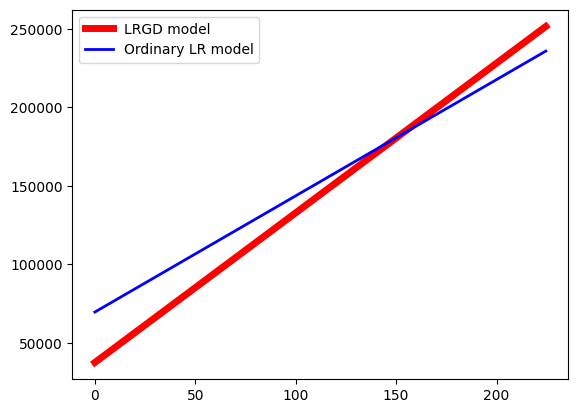

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.linear_model import LinearRegression

class LinearRegressionGradientDescent:
    def __init__(self):
        self.coeff = None
        self.features = None
        self.target = None
        self.mse_history = None

    def set_coefficients(self, *args):
        # Mapiramo koeficijente u niz oblika (n + 1) x 1
        self.coeff = np.array(args).reshape(-1, 1)

    def cost(self):
        predicted = self.features.dot(self.coeff)
        s = pow(predicted - self.target, 2).sum()
        return (0.5 / len(self.features)) * s

    def predict(self, features):
        features = features.copy(deep=True)
        features.insert(0, 'c0', np.ones((len(features), 1)))
        features = features.to_numpy()
        return features.dot(self.coeff).reshape(-1, 1).flatten()

    def gradient_descent_step(self, learning_rate):
        predicted = self.features.dot(self.coeff)
        s = self.features.T.dot(predicted - self.target)
        gradient = (1. / len(self.features)) * s
        self.coeff = self.coeff - learning_rate * gradient
        return self.coeff, self.cost()

    def perform_gradient_descent(self, learning_rate, num_iterations=100):
        self.mse_history = []
        for i in range(num_iterations):
            _, curr_cost = self.gradient_descent_step(learning_rate)
            self.mse_history.append(curr_cost)
        return self.coeff, self.mse_history

    def fit(self, features, target):
        self.features = features.copy(deep=True)
        coeff_shape = len(features.columns) + 1
        self.coeff = np.zeros(shape=coeff_shape).reshape(-1, 1)
        self.features.insert(0, 'c0', np.ones((len(features), 1)))
        self.features = self.features.to_numpy()
        self.target = target.to_numpy().reshape(-1, 1)

# Dodatak: Citanje podataka
data = pd.read_csv('datasets/house_prices.csv', sep=';')
X = data.loc[:, ['area']]
y = data.loc[:, 'price']

# Generisanje 200 vrednosti za x osu podjednako udaljenih u opsegu [0, maksimalna_povrsina_nekretnine]
# koje će predstavljati površine nekretnina za koje se radi predikcija.
estates = pd.DataFrame(data=np.linspace(0, max(X['area']), num=200))

# Kreiranje i obučavanje modela
lrgd = LinearRegressionGradientDescent()
lrgd.fit(X, y)
learning_rates = np.array([[0.17], [0.0000475]])
res_coeff, mse_history = lrgd.perform_gradient_descent(learning_rates, 20)

# Vizualizacija modela
plt.figure(1)
line, = plt.plot(estates[0], lrgd.predict(estates), lw=5, c='red')
line.set_label('LRGD model')

# Kreiranje i obučavanje sklearn.LinearRegression modela
lr_model = LinearRegression()
lr_model.fit(X, y)

# Vizualizacija modela
line, = plt.plot(estates[0], lr_model.predict(estates), lw=2, c='blue')
line.set_label('Ordinary LR model')

# Lokacija legende (gore levo)
plt.legend(loc='upper left')
plt.show()


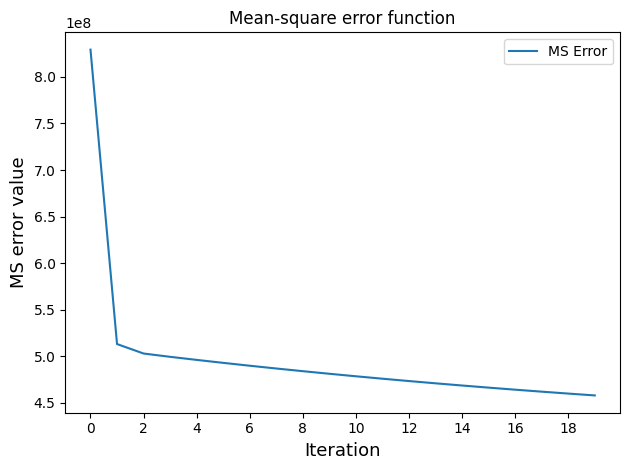

In [9]:
# Vizuelizacija MS_error funkcije kroz iteracije
# za model koji koristi gradijentni spust.
plt.figure('MS Error')
plt.plot(np.arange(0, len(mse_history), 1), mse_history)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('MS error value', fontsize=13)
plt.xticks(np.arange(0, len(mse_history), 2))
plt.title('Mean-square error function')
plt.tight_layout()
plt.legend(['MS Error'])
plt.show()

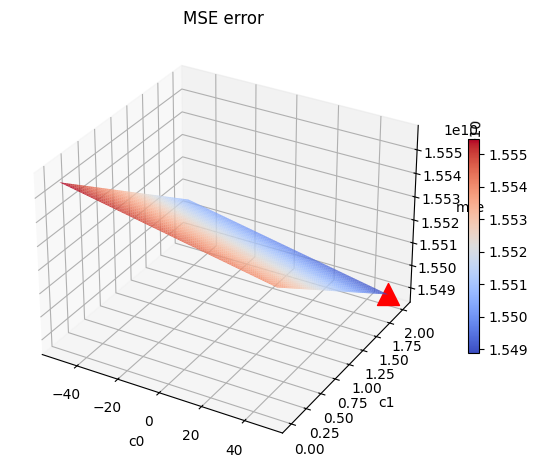

In [11]:
# Vizuelizacija Mean-square error funkcije 
# u zavisnosti od vrednosti koeficijenata c0 i c1.
# Pravimo meshgrid, odnosno kombinacije svake dve vrednosti:
# c0 = -50, c1 = 0; c0 = -50, c1 = 0.02 ... ;
# c0 = -49, c1 = 0; c0 = -49, c1 = 0.02 ...;
# ...
# c0 = 50, c1 = 2; ...
spots = 100
c0, c1 = np.meshgrid(np.linspace(-50, 50, spots), np.linspace(0, 2, spots))
# Od visedimenzionih nizova pravimo jednodimenzione nizove
c0 = c0.flatten()
c1 = c1.flatten()
mse_values = []
for i in range(len(c0)):
    lrgd.set_coefficients(c0[i], c1[i])
    mse_values.append(lrgd.cost())
fig = plt.figure('MSE hyperplane')
# U okviru figure-a dodaju se axes-i (subplot-ovi u okviru plot-a).
# Figure objekat je 1x1, a trenutni axes je 1 (numeracija krece od 1).
ax = plt.subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(c0.reshape(spots, spots), c1.reshape(spots, spots),
                       np.array(mse_values).reshape(spots, spots),
                       cmap=cm.coolwarm)
min_mse_ind = mse_values.index(min(mse_values))
ax.scatter(c0[min_mse_ind], c1[min_mse_ind], mse_values[min_mse_ind],
           c='r', s=250, marker='^')
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel('c0')
ax.set_ylabel('c1')
ax.set_zlabel('mse')
plt.title('MSE error')
plt.tight_layout()
plt.show()


In [13]:
# Testiranje predikcije oba modela nad jednim uzorkom
# price = c1 * area + c0
example_estate_sqm = 122
example_estate = pd.DataFrame(data=[example_estate_sqm])
lrgd.set_coefficients(res_coeff)
print(f'LRGD price for {example_estate_sqm}sqm house is '
      f'{lrgd.predict(example_estate)[0]:.2f} thousand $')
print(f'LRGD c0: {lrgd.coeff.flatten()[0]:.2f}, '
      f'c1: {lrgd.coeff.flatten()[1]:.2f}')
print(f'LR price for {example_estate_sqm}sqm house is '
      f'{lr_model.predict(example_estate)[0]:.2f} thousand $')
print(f'LR c0: {lr_model.intercept_:.2f}, '
      f'c1: {lr_model.coef_[0]:.2f}')


LRGD price for 122sqm house is 153684.36 thousand $
LRGD c0: 37417.30, c1: 953.01
LR price for 122sqm house is 159836.33 thousand $
LR c0: 69538.29, c1: 740.15


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
# Stampanje mse za oba modela
lrgd.set_coefficients(res_coeff)
print(f'LRGD MSE: {lrgd.cost():.2f}')
c = np.concatenate((np.array([lr_model.intercept_]), lr_model.coef_))
lrgd.set_coefficients(c)
print(f'LR MSE: {lrgd.cost():.2f}')
# Restauracija koeficijenata
lrgd.set_coefficients(res_coeff)
# Ispis:
# LRGD MSE: 1160.05
# LR MSE: 1160.05


LRGD MSE: 457714268.46
LR MSE: 399308179.03


In [19]:
# Racunanje score-a za oba modela
data_test = pd.read_csv('datasets/house_prices.csv',sep=';')
X = data_test.loc[:, ['area']]
y = data_test['price'] / 1000
# Zapamte se koeficijenti LR modela, 
# da bi se postavili LRGD koeficijenti i izracunao LR score.
lr_coef_ = lr_model.coef_
lr_int_ = lr_model.intercept_
lr_model.coef_ = lrgd.coeff.flatten()[1:]
lr_model.intercept_ = lrgd.coeff.flatten()[0]
print(f'LRGD score: {lr_model.score(X, y):.2f}')
# Restauriraju se koeficijenti LR modela
lr_model.coef_ = lr_coef_
lr_model.intercept_ = lr_int_
print(f'LR score: {lr_model.score(X, y):.2f}')


LRGD score: -14355472.79
LR score: -14455687.37
